In [43]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [133]:
# Show the figures / plots inside the notebook
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        plt.axis('off')
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [53]:
def process_image(path):
    img = cv2.imread(path)
    height = 224
    if img.all() != None:
        width = img.shape[1]*height/img.shape[0]
        img = cv2.resize(img, (int(width), height), None, 0.5,
                         0.5, interpolation=cv2.INTER_AREA)
        return img,True
    else:
        return None,False

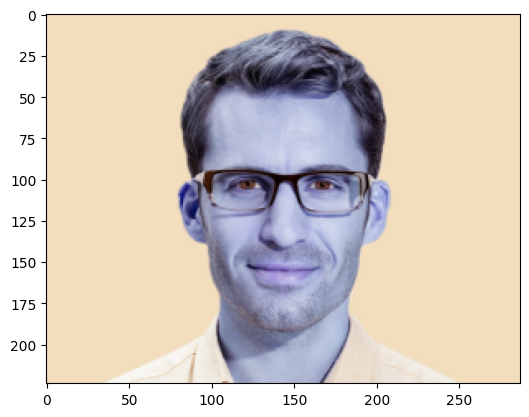

In [125]:
ROOT_PATH = "faces/"
images_paths = [ROOT_PATH+img for img in os.listdir(ROOT_PATH)]

for path in images_paths:
    img,sucess=process_image(path)
    if sucess:
        plt.imshow(img)

In [178]:
# eye_haarCascade = cv2.CascadeClassifier(
#     cv2.data.haarcascades+'haarcascade_eye.xml')

# eye_glasses_haarCascade = cv2.CascadeClassifier(
#     cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')

# face_haarCascade = cv2.CascadeClassifier(
#     cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# def get_faces(image):
#     faces=[]

#     gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     face_coordinates = face_haarCascade.detectMultiScale(gray_img, 1.3, 5)

#     for (x, y, w, h) in face_coordinates:
#         face = gray_img[y:y + h, x:x + w]
#         eye_coordinates = eye_haarCascade.detectMultiScale(face)
#         cv2.rectangle(image, (x, y), (x + w, y + h),
#                       color=(255, 0, 0), thickness=2)
        
#         print(len(eye_coordinates))
#         for (x2, y2, w2, h2) in eye_coordinates:
#             eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
#             eye_radius = int(round((w2 + h2) * 0.25))
#             cv2.circle(image, center=eye_center, radius=eye_radius,
#                        color=(255, 255,0))
        
#         faces.append(gray_img[y:y + h, x:x + w])
#     return faces

In [242]:
eye_haarCascade = cv2.CascadeClassifier(
    cv2.data.haarcascades+'haarcascade_eye.xml')

eye_glasses_haarCascade = cv2.CascadeClassifier(
    cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')

face_haarCascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


def get_faces_with_eyes(image):
    faces = []
    response=[]
    faces_with_edges=[]


    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_coordinates = face_haarCascade.detectMultiScale(gray_img, 1.3, 5)

    for (x, y, w, h) in face_coordinates:
        face = gray_img[y:y + h, x:x + w]
        
        eye_coordinates = eye_haarCascade.detectMultiScale(face, 1.1)
        cv2.rectangle(image, (x, y), (x + w, y + h),
                      color=(255, 0, 0), thickness=2)

        if len(eye_coordinates)<2:
            eye_coordinates = eye_glasses_haarCascade.detectMultiScale(
                face, 1.1)

        
        if len(eye_coordinates) < 2:
            response.append("Can't detect 2 eyes, not sure of this face")
            faces_with_edges.append(face)
            faces.append(face)
            continue

        for (x2, y2, w2, h2) in eye_coordinates:
            eye_center = (x+x2 + w2 // 2, y+y2 + h2 // 2)
            eye_radius = int(round((w2 + h2) * 0.25))
            cv2.circle(image, center=eye_center, radius=eye_radius,
                       color=(255, 255, 0))
        
        faces_with_edges.append(image[y:y + h, x:x + w, :])
        faces.append(face)
        response.append("Success")

    return faces,faces_with_edges,response

In [243]:
# img2, success = process_image(images_paths[23])
# img3, success = process_image(images_paths[24])
# img1, success = process_image(images_paths[7])


# output2 = get_faces(img2)
# output3 = get_faces(img3)
# output1 = get_faces(img1)


# output1.extend(output2)
# output1.extend(output3)

# show_images([img1,img2,img3])

# show_images(output1)

Original Images


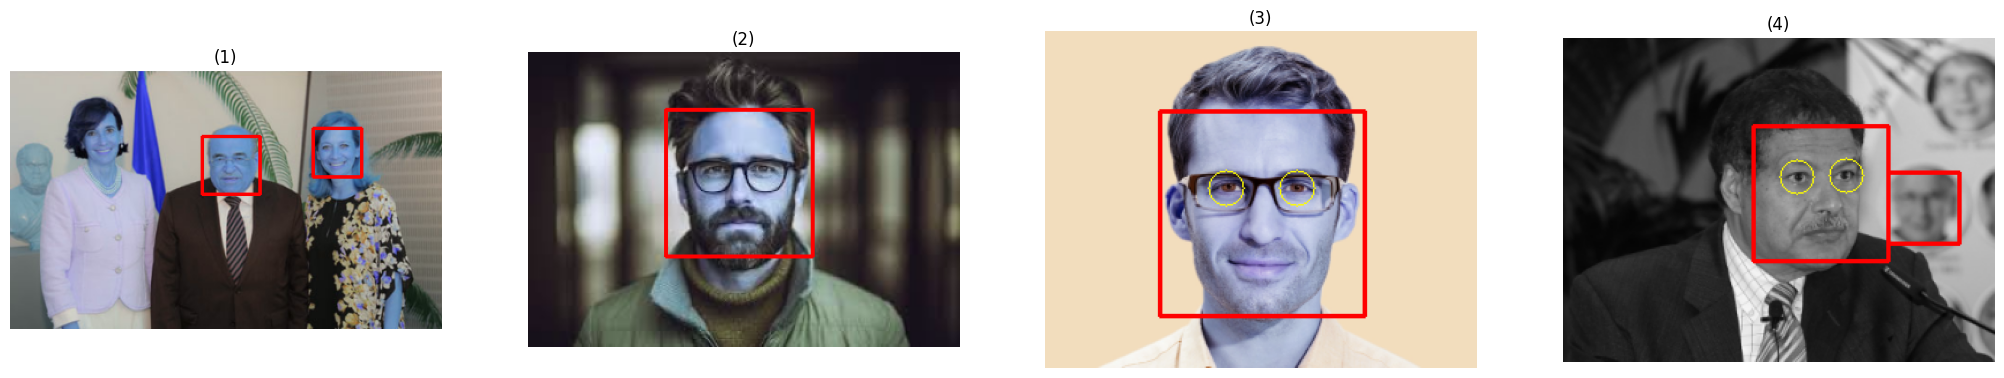

Faces without edges


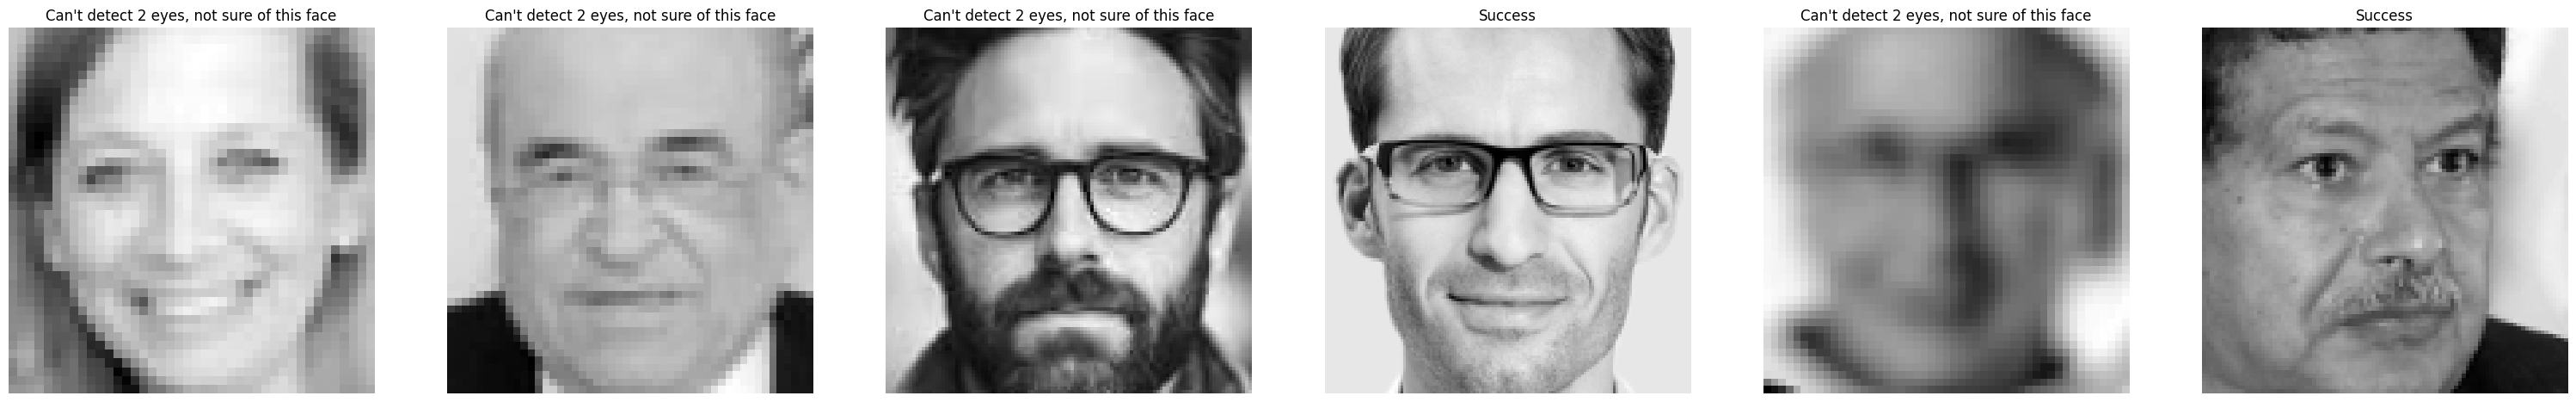

Faces with edges if success


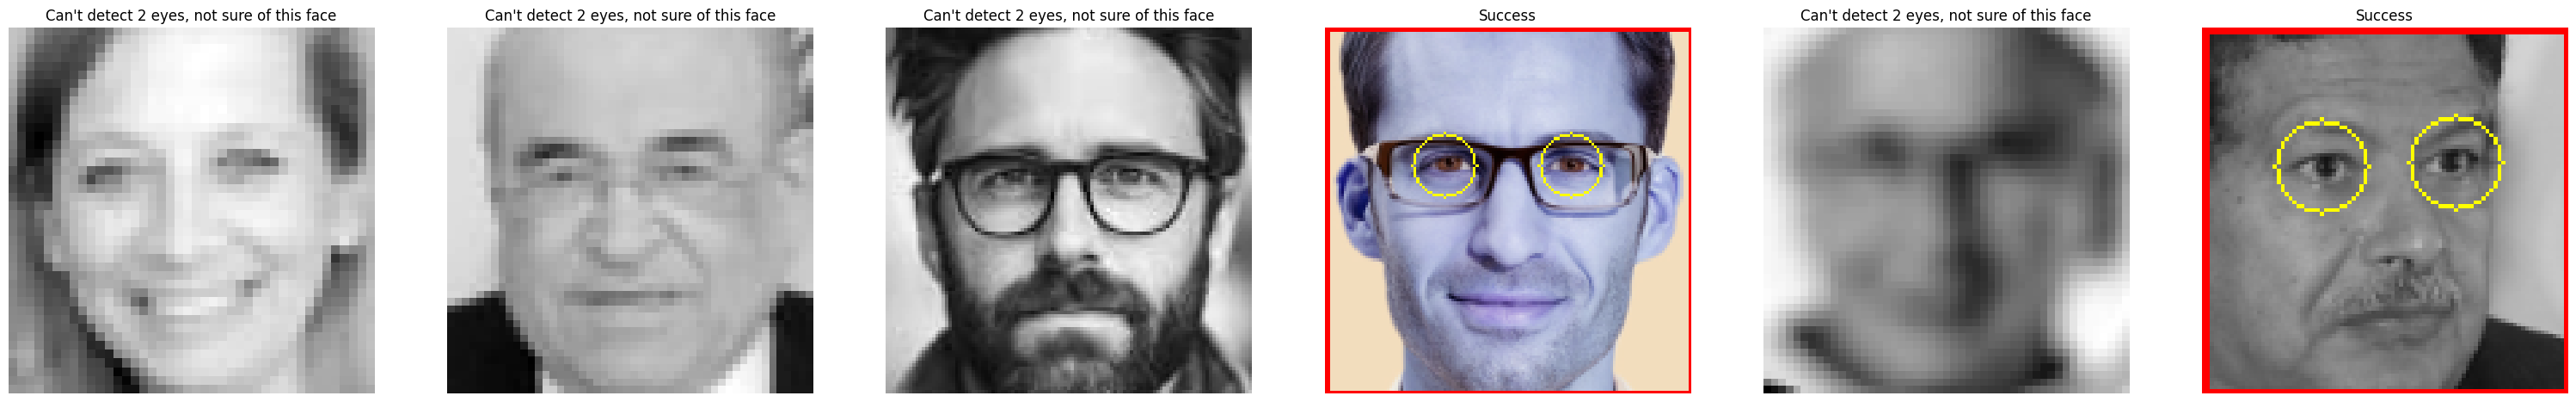

In [244]:
img1, success = process_image(images_paths[7])
img2, success = process_image(images_paths[23])
img3, success = process_image(images_paths[24])
img4, success = process_image(images_paths[5])



faces1,faces_with_edges1,responses1 = get_faces_with_eyes(img1)
faces2, faces_with_edges2, responses2 = get_faces_with_eyes(img2)
faces3, faces_with_edges3, responses3 = get_faces_with_eyes(img3)
faces4, faces_with_edges4, responses4 = get_faces_with_eyes(img4)


output1=[]
output2 = []
res=[]

output1.extend(faces1)
output1.extend(faces2)
output1.extend(faces3)
output1.extend(faces4)


res.extend(responses1)
res.extend(responses2)
res.extend(responses3)
res.extend(responses4)



output2.extend(faces_with_edges1)
output2.extend(faces_with_edges2)
output2.extend(faces_with_edges3)
output2.extend(faces_with_edges4)



print("Original Images")
show_images([img1, img2, img3,img4])

print("Faces without edges")
show_images(output1,res)

print("Faces with edges if success")
show_images(output2,res)